<a href="https://colab.research.google.com/github/AnnmariyaFrancis/ICT-Assignments/blob/main/USA_arrest_pca_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/USArrests.csv", index_col = 0)

In [3]:
data.head(3)

,Murder,Assault,UrbanPop,Rape
Nan,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0


In [4]:
data.tail(3)

,Murder,Assault,UrbanPop,Rape
Nan,,,,
West Virginia,5.7,81,39,9.3
Wisconsin,2.6,53,66,10.8
Wyoming,6.8,161,60,15.6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [6]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


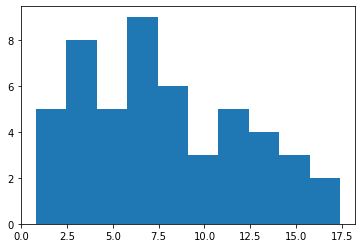

In [7]:
plt.hist(data['Murder'])
plt.show()

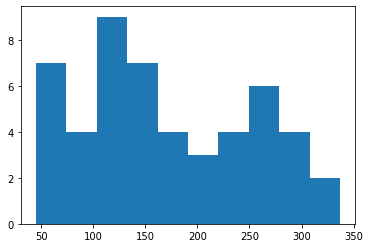

In [8]:
plt.hist(data['Assault'])
plt.show()

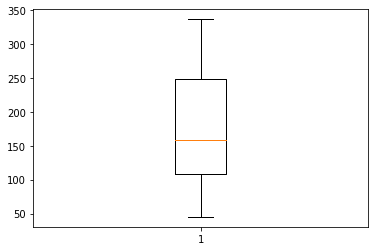

In [9]:
plt.boxplot(data['Assault'])
plt.show()

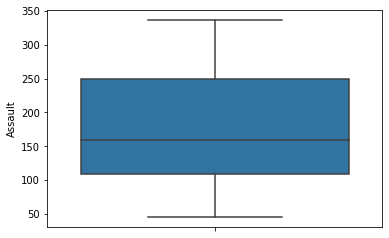

In [10]:
sns.boxplot(y = data['Assault'])
plt.show()

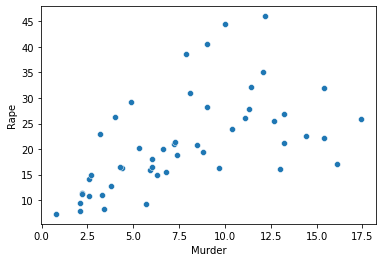

In [11]:
sns.scatterplot(x = "Murder", y = "Rape", data = data)
plt.show()

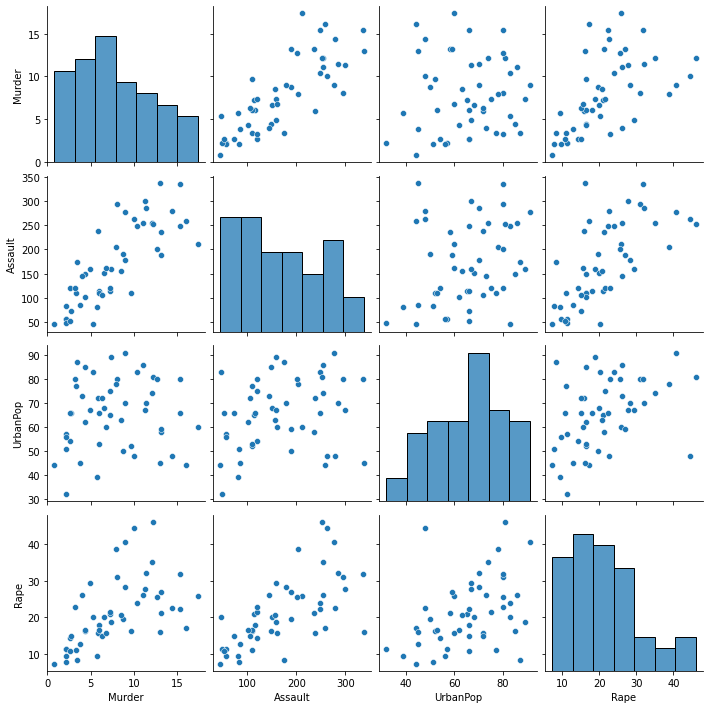

In [12]:
sns.pairplot(data)
plt.show()

In [13]:
data.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [14]:
x = data

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmean_inst = KMeans(n_clusters=6)

In [17]:
kmean_inst.fit(x)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [18]:
kmean_inst.inertia_

18768.000666666667

In [19]:
kmean_inst.cluster_centers_

array([[  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 11.76666667, 257.91666667,  68.41666667,  28.93333333],
       [ 11.5       , 195.33333333,  66.16666667,  27.43333333],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [ 11.95      , 316.5       ,  68.        ,  26.7       ],
       [  5.75      , 156.75      ,  74.        ,  19.4       ]])

In [20]:
kmean_inst.labels_

array([1, 1, 4, 2, 1, 2, 0, 1, 4, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 4, 5, 1,
       3, 1, 2, 0, 0, 1, 3, 5, 1, 1, 4, 3, 0, 5, 5, 0, 5, 1, 3, 2, 2, 0,
       3, 5, 5, 3, 3, 5], dtype=int32)

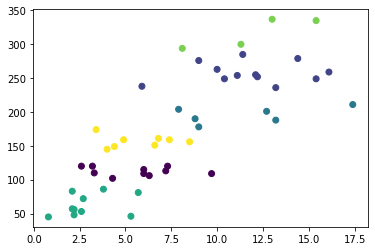

In [21]:
plt.scatter(data['Murder'], data['Assault'], c = kmean_inst.labels_)
plt.show()

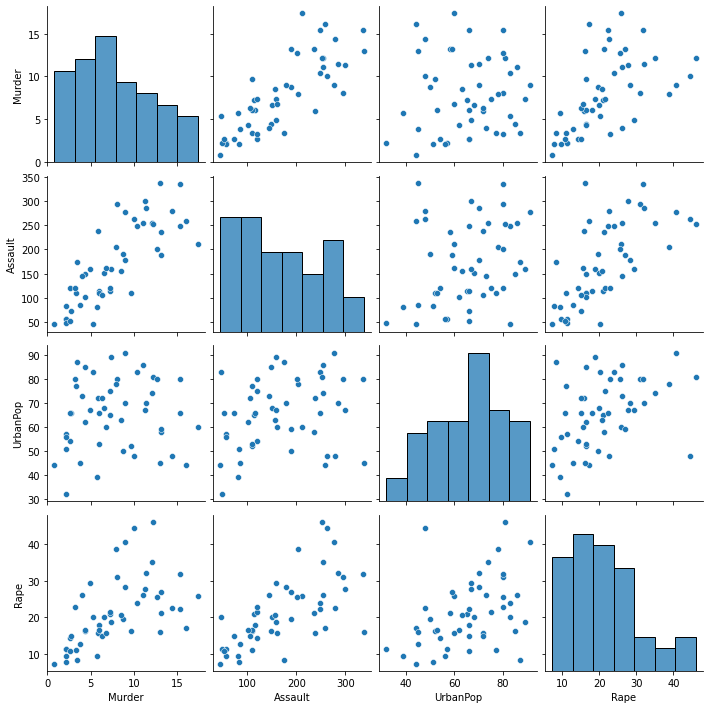

In [22]:
sns.pairplot(data)

In [23]:
from sklearn.decomposition import PCA

In [24]:
pc = PCA()

In [25]:
pc_arr = pc.fit_transform(data)

In [26]:
pc_arr.shape

(50, 4)

In [29]:
pc_data = pd.DataFrame(pc_arr)

In [30]:
(pc.explained_variance_ratio_ * 100).round(1)

array([96.6,  2.8,  0.6,  0.1])

In [31]:
pc_data.corr().round()

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,1.0,-0.0,0.0
2,0.0,-0.0,1.0,-0.0
3,0.0,0.0,-0.0,1.0


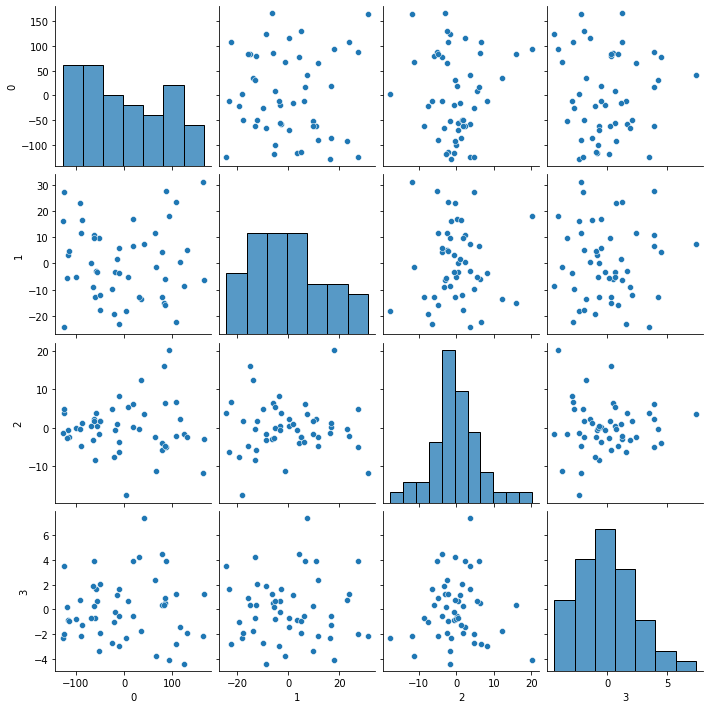

In [32]:
sns.pairplot(pc_data)

In [35]:
x=pc_data

In [36]:
kmean_inst.fit(x)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [37]:
kmean_inst.inertia_

18768.00066666666

In [38]:
kmean_inst.cluster_centers_

array([[ 8.76181871e+01,  9.43768505e-01,  1.35351994e+00,
         1.75063851e-01],
       [-1.09015387e+02,  6.75554632e+00, -2.20578170e-01,
        -5.79703878e-01],
       [-1.37737280e+01, -8.81107331e+00, -2.69730241e+00,
        -8.57514552e-01],
       [-5.84677660e+01, -2.79111970e+00, -1.03570013e-01,
         3.75642961e-01],
       [ 1.45742059e+02,  5.24963841e+00, -4.68217946e+00,
        -1.78638037e+00],
       [ 2.51058121e+01, -2.46575918e-01,  4.55106328e+00,
         2.32424681e+00]])

In [39]:
kmean_inst.labels_

array([0, 0, 4, 5, 0, 5, 3, 0, 4, 5, 1, 3, 0, 3, 1, 3, 3, 0, 1, 4, 2, 0,
       1, 0, 5, 3, 3, 0, 1, 2, 0, 0, 4, 1, 3, 2, 2, 3, 2, 0, 1, 5, 5, 3,
       1, 2, 2, 1, 1, 2], dtype=int32)